# SVM Classification and Confusion Matrix Analysis

This code snippet demonstrates SVM classification on the 'bank-additional-full.csv' dataset, including data preprocessing, training, prediction, and the calculation of classification error. Additionally, a confusion matrix is plotted to provide further insight into the model's performance.

## Libraries Used

- **matplotlib.pyplot (plt):** For plotting figures and visualizations.
- **seaborn (sn):** For creating heatmaps.
- **sklearn.metrics.confusion_matrix:** For generating a confusion matrix.
- **pandas (pd):** For data manipulation and reading CSV data.
- **numpy (np):** For numerical operations on the data.
- **sklearn.datasets:** For loading datasets.
- **sklearn.model_selection:** For splitting the data into training and test sets and performing grid search for hyperparameter tuning.
- **sklearn.svm.SVC:** Support Vector Machine classifier.
- **sklearn.metrics.accuracy_score:** For evaluating the accuracy of the classifier.


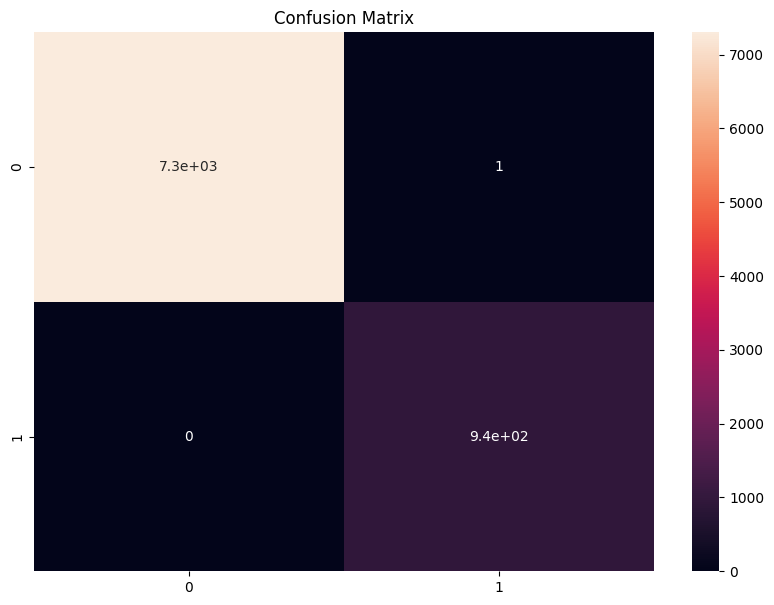

Classification error:  0.012138868657441126


In [1]:
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

def calculate_classification_error(y_true, y_pred):
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True)
    # name of the plot
    plt.title('Confusion Matrix')
    # show plot
    plt.show()
    
    # Extracting elements from the confusion matrix
    n00, n01, n10, n11 = cm.ravel()
    
    # Classification error calculation
    classification_error = 100 * (n01 + n10) / (n00 + n11 + n01 + n10)
    
    return classification_error

# import A2-ring-merged.txt as a dataframe
df_bank = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Replace "unknown" with NaN
df_bank.replace('unknown', pd.NA, inplace=True)

# Identify numeric columns
numeric_columns = df_bank.select_dtypes(include=['number']).columns

# Handle missing values for numeric columns (impute with the mean)
df_bank[numeric_columns] = df_bank[numeric_columns].fillna(df_bank[numeric_columns].mean())

# Identify categorical columns
categorical_columns = df_bank.select_dtypes(include=['object']).columns

# One-hot encode categorical features
df_bank = pd.get_dummies(df_bank, columns=categorical_columns)
# Convert boolean values to integers (1 for True, 0 for False)
df_bank = df_bank.astype(int)

X = df_bank.iloc[:, :-1]
y = df_bank.iloc[:, -1]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ravel y_train and y_test
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Train a SVM classifier with cross-validation
svm = SVC(C=0.01, gamma='scale', kernel='linear')
svm.fit(X_train, y_train)

# Predict the test set
y_pred = svm.predict(X_test)

# Calculate the classification error
classification_error = calculate_classification_error(y_test, y_pred)

print("Classification error: ", classification_error)

# PCA Dimensionality Reduction and Visualization

This code snippet performs PCA dimensionality reduction on `X_test` for visualization purposes after SVM classification. It includes visualizations of the original test set, the predicted test set, and the differences between the actual and predicted classes.

## Libraries Used

- **matplotlib.pyplot (plt):** For plotting figures and visualizations.
- **sklearn.decomposition.PCA:** For performing PCA (Principal Component Analysis) dimensionality reduction.


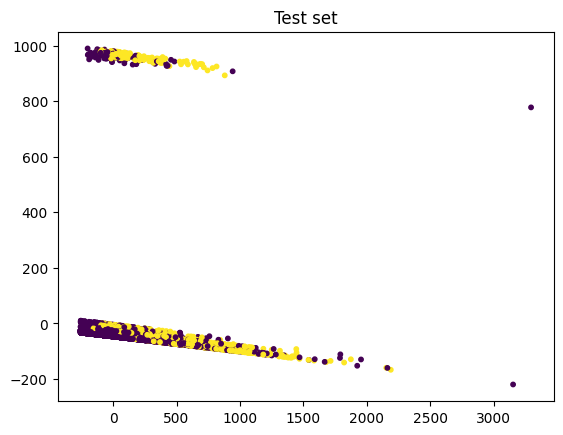

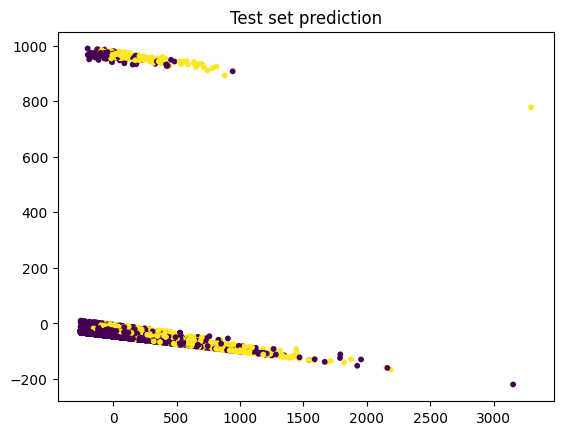

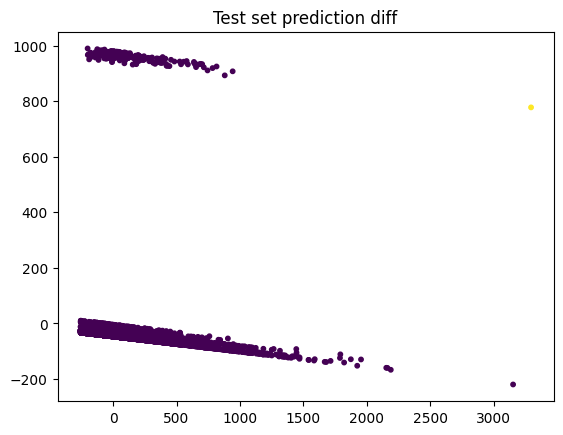

In [2]:
# PCA dimensionality reduction to X_test for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test, s=10)
plt.title("Test set")
plt.show()

plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_pred, s=10)
plt.title("Test set prediction")
plt.show()

# make a plot with the different points between the two classes in the ytest and ypred
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c=y_test ^ y_pred, s=10)
plt.title("Test set prediction diff")
plt.show()